In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# удалим столбец id - обычная индекация не несет в себе информативности
df = df.drop(['Id'], axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Задание 1. Изучим распределение целевого класса и несколько категориальных
## (Но заметим, что у нас все столбцы содержат только числовые признаки, поэтому выводим только распределение целевого класса, - в нашем случае quality)

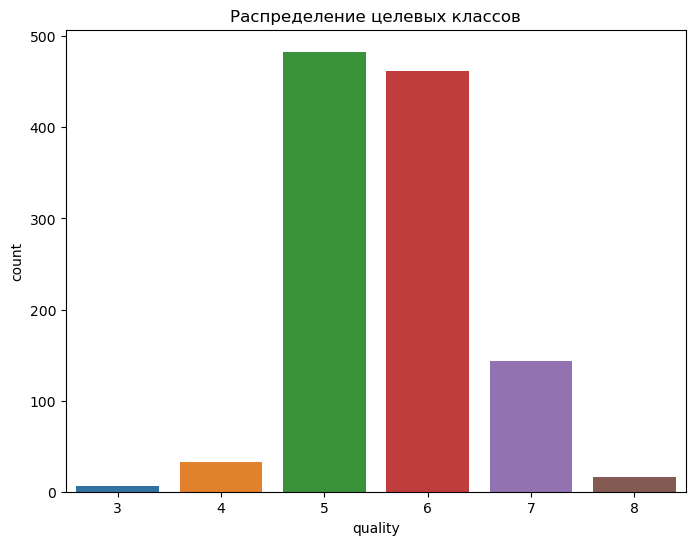

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Распределение целевых классов')
plt.show()

Вывод: чаще всего quality 5 и 6, реже всего 3 и 8

## Задание 2. Распределение некоторых числовых признаков

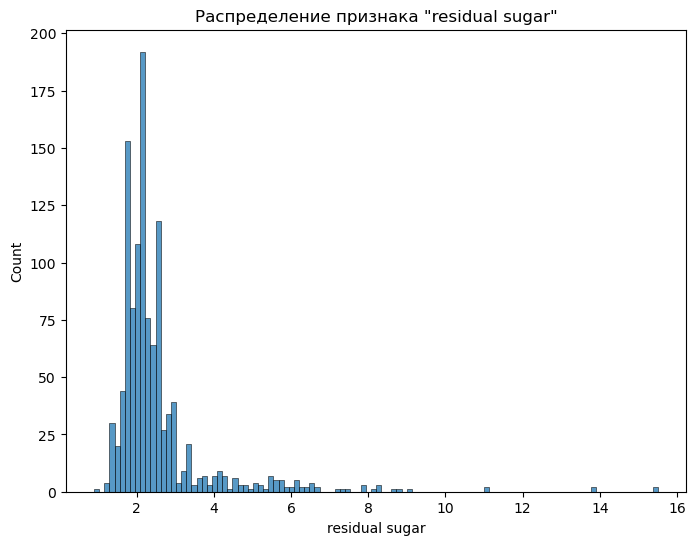

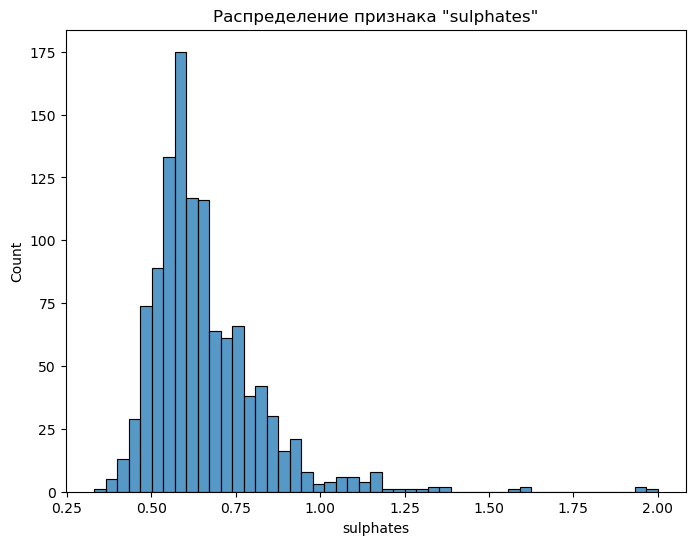

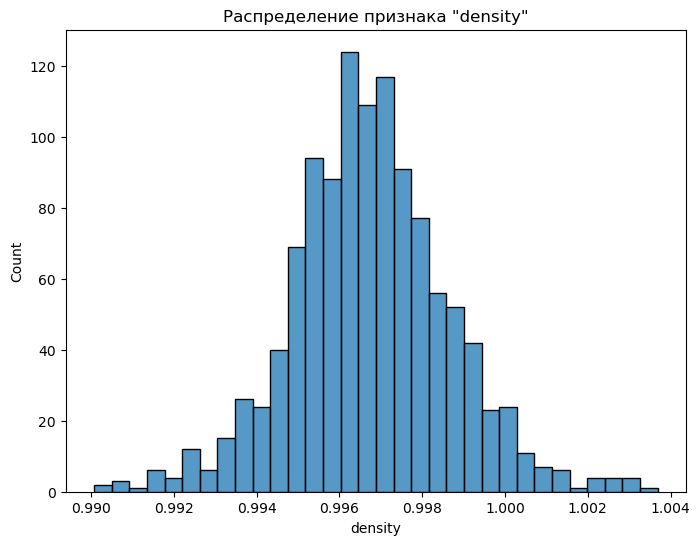

In [9]:
numerical_features = ['residual sugar', 'sulphates', 'density']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature)
    plt.title(f'Распределение признака "{feature}"')
    plt.show()

## Задание 3. Нормализация нескольких числовых признаков

In [11]:
# нормализируем признаки из прошлого пукнта
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.068493,0.076,11.0,34.0,0.567548,3.51,0.137725,9.4,5
1,7.8,0.88,0.00,0.116438,0.098,25.0,67.0,0.494126,3.20,0.209581,9.8,5
2,7.8,0.76,0.04,0.095890,0.092,15.0,54.0,0.508811,3.26,0.191617,9.8,5
3,11.2,0.28,0.56,0.068493,0.075,17.0,60.0,0.582232,3.16,0.149701,9.8,6
4,7.4,0.70,0.00,0.068493,0.076,11.0,34.0,0.567548,3.51,0.137725,9.4,5


## Задание 4. Корреляция признаков

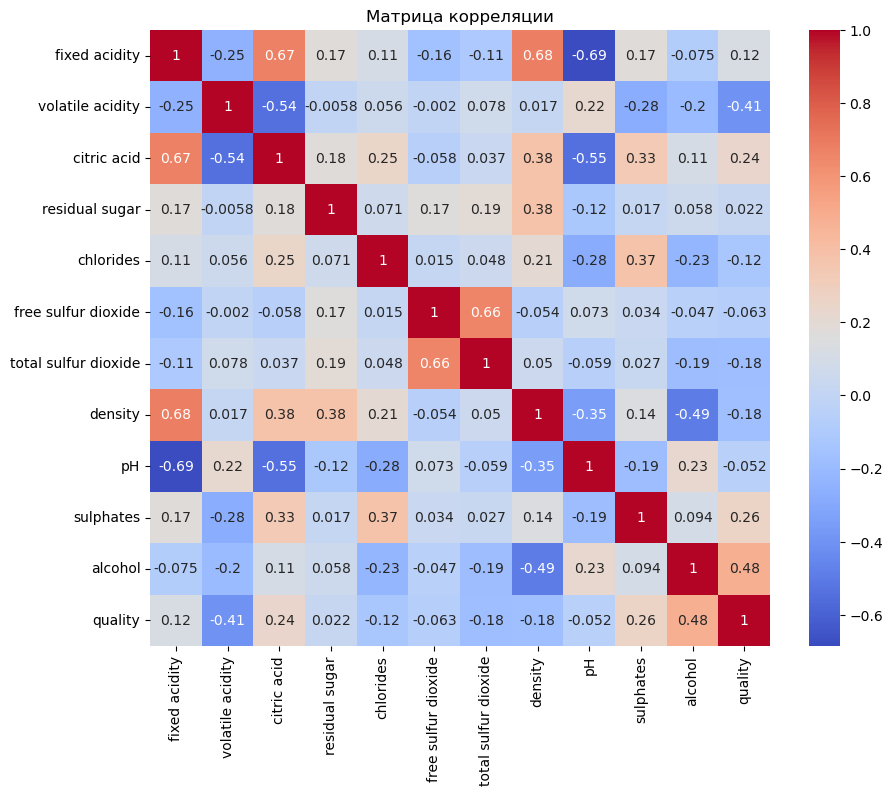

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
# нарисуем тепловую таблицу корреляций
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Вывод: проанализировав данную таблицу можем сделать вывод, что наиболее с нашей target переменной коррелирует признак alcohol